# Prepare heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in\
an attempt to build a ML model capable of predicting whether or not someone has heart disease\
based on their medical attribuites.

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

In [1]:
import sklearn
sklearn_version = sklearn.__version__
print(f"Scikit-learn version: {sklearn_version}")

Scikit-learn version: 1.7.0


## 1. Problem Definition

Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data
The original date came from the Cleavland data of the UCI ML repository.\
https://archive.ics.uci.edu/dataset/45/heart+disease\
There is also a version if available on Kaggle.\
https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

## 3. Evaluation

If we can reach 95% accuracy at predicting whether or not a patient has heart disease\
during proof of concept, we'll pursue the project.

## 4. Features

| Feature  | Description | Example Values |
|:-----|:-----|:------|
| **age** | Age in years | 29, 45, 60 |
| **sex** | 1 = male; 0 = female | 0, 1  |
| **cp**  | Chest pain type | 0: Typical angina (chest pain), 1: Atypical angina (chest pain not related to heart), 2: Non-anginal pain (typically esophageal spasms (non heart related), 3: Asymptomatic (chest pain not showing signs of disease) |
| **trestbps** | Resting blood pressure (in mm Hg on admission to the hospital)  | 120, 140, 150 |
| **chol** | Serum cholesterol in mg/dl | 180, 220, 250 |
| **fbs** | Fasting blood sugar > 120 mg/dl (1 = true; 0 = false) | 0, 1 |
| **restecg** | Resting electrocardiographic results | 0: Nothing to note, 1: ST-T Wave abnormality, 2: Left ventricular hypertrophy  |
| **thalach** | Maximum heart rate achieved | 160, 180, 190 |
| **exang**  | Exercise induced angina (1 = yes; 0 = no) | 0, 1 |
| **oldpeak**  | ST depression (heart potentially not getting enough oxygen) induced by exercise relative to rest | 0.5, 1.0, 2.0  |
| **slope** | The slope of the peak exercise ST segment | 0: Upsloping, 1: Flatsloping, 2: Downsloping |
| **ca** | Number of major vessels (0-3) colored by fluoroscopy | 0, 1, 2, 3 |
| **thal** | Thalium stress result  | 1: Normal, 3: Normal, 6: Fixed defect, 7: Reversible defect |
| **target** | Have disease or not (1 = yes; 0 = no) | 0, 1 |

> **Note:** No personal identifiable information (PPI) can be found in the dataset.

It's a good idea to save these to a Python dictionary or in an external file, so we can look at them later without coming back here.

## Prepare the tools

We're going to use pandas, matplotlib and NumPy for data analysis and manipulation.

In [54]:
# Import the tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Preprocess tools
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Models from Sckit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import  confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, RocCurveDisplay, roc_auc_score

# Pipelines
from sklearn.pipeline import Pipeline


## Load Data

In [3]:
df = pd.read_csv("../../data/heart-disease.csv")
df.shape # (rows, columns)

(303, 14)

## Data Exploration(exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter expert on the dataset\
your're working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you about them?
5. How can you add, change or remove features to get more out of your data?

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


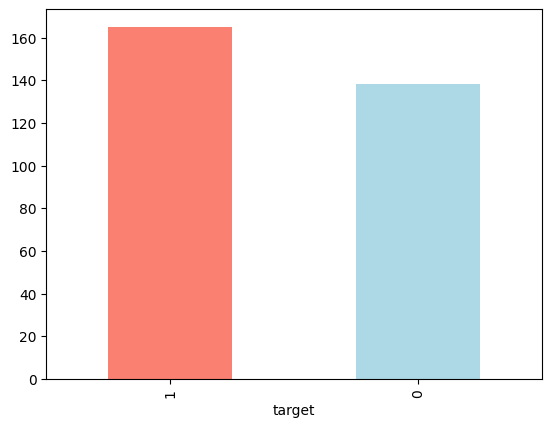

In [6]:
df.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# Check for missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Diseases Frequency accoding to Sex

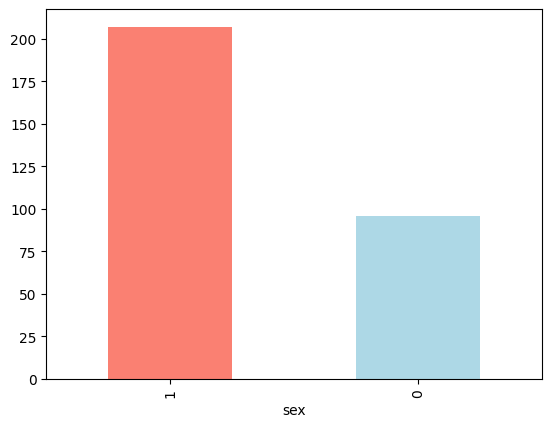

In [10]:
df.sex.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

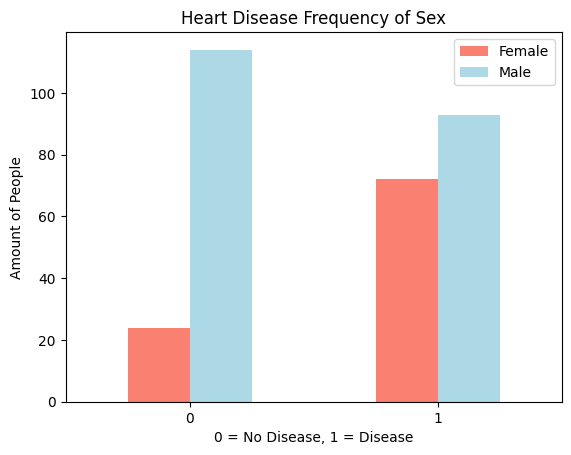

In [11]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex).plot(kind="bar", color=["salmon", "lightblue"]);
plt.title("Heart Disease Frequency of Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount of People")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

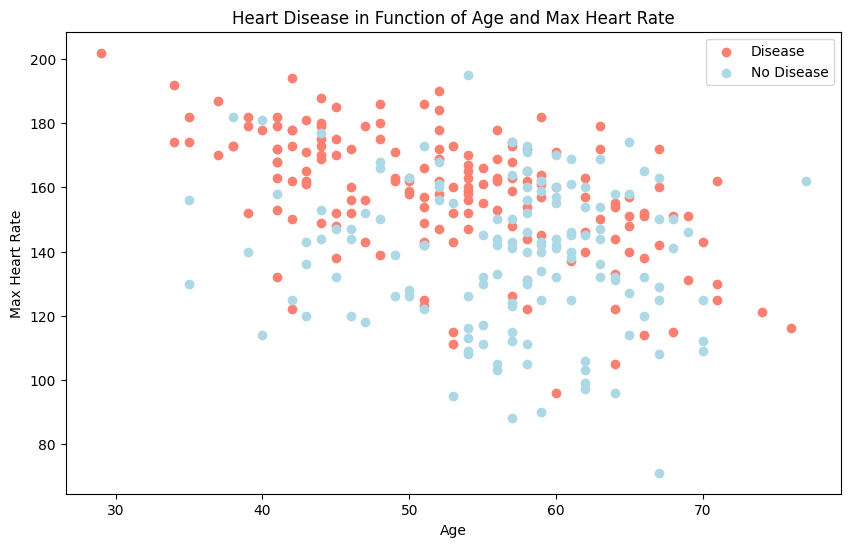

In [12]:
### Age vs Max Heart Rate for Heart Disease
plt.figure(figsize=(10, 6))
plt.scatter(df.age[df.target == 1], df.thalach[df.target == 1],
            c="salmon")
plt.scatter(df.age[df.target == 0], df.thalach[df.target == 0],
            c="lightblue")

# Add some helpful information
plt.title("Heart Disease in Function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"])
plt.show();

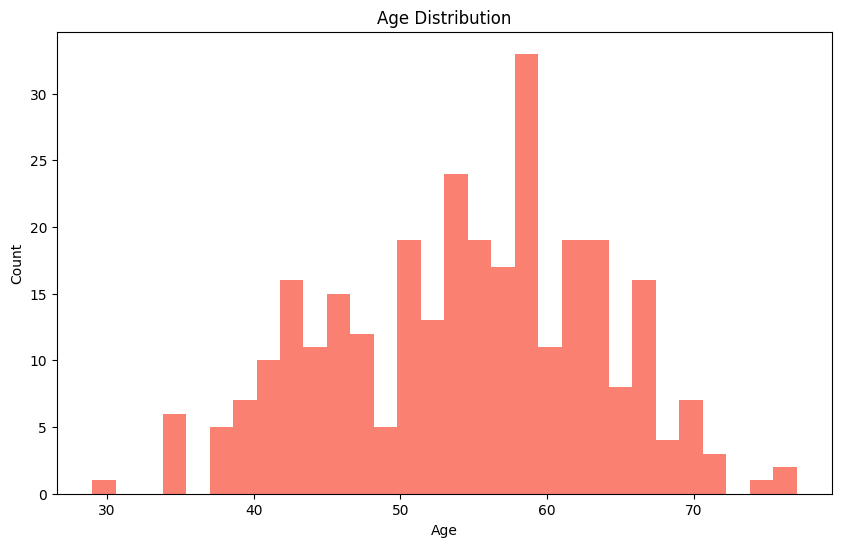

In [13]:
# Check the distribution of the age column with a histogram
plt.figure(figsize=(10, 6))
plt.hist(df.age, bins=30, color="salmon")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show();

### Heart disease frequency per Chest Pain Type
 0: Typical angina (chest pain)\
 1: Atypical angina (chest pain not related to heart)\
 2: Non-anginal pain (typically esophageal spasms (non heart related)\
 3: Asymptomatic (chest pain not showing signs of disease)

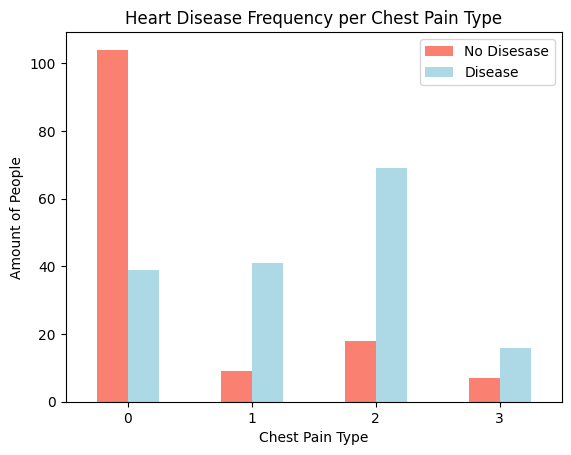

In [14]:
pd.crosstab(df.cp, df.target).plot(kind="bar", color=["salmon", "lightblue"]);
plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount of People")
plt.legend(["No Disesase", "Disease"])
plt.xticks(rotation=0);

In [23]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


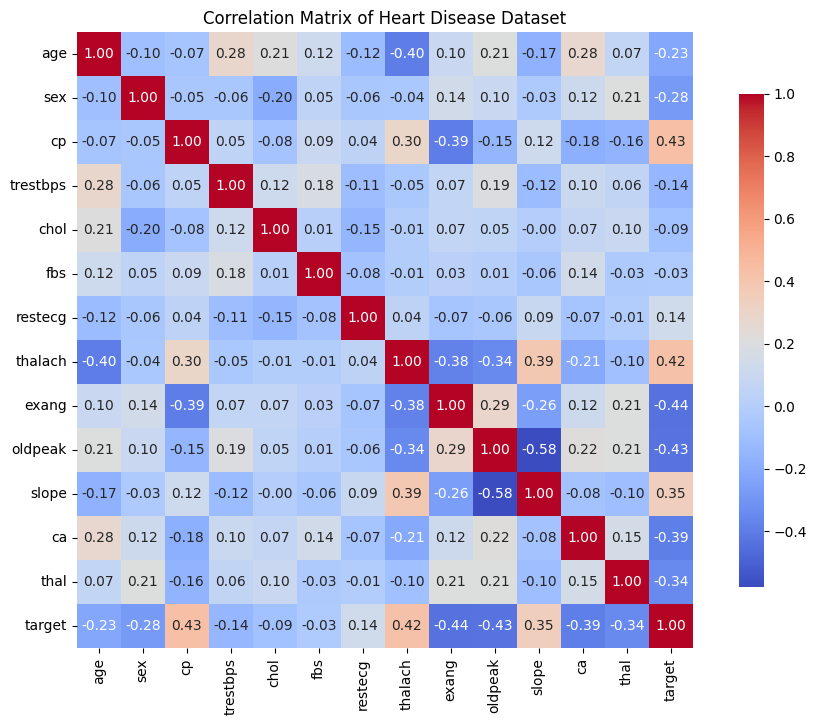

In [45]:
# Visualize the correlation matrix with a heatmap
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Matrix of Heart Disease Dataset")
plt.show();

## Modeling

In [16]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
# Split data into X and y
X = df.drop("target", axis=1)
y = df["target"]

In [18]:
# split data into train and test sets
np.random.seed(42)  # For reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [20]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


Now let's check https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html to select\
proper model(s)

We're try 3 modles:
1. Logistic Regression
2. K-Nearest Neigbhours Classifier
3. Random Forest Classifier

In [21]:
# Put models om dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Create a function to fit and score the models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    
    models: dict of {model_name: model_instance}
    X_train: training data features
    X_test: testing data features
    y_train: training data labels
    y_test: testing data labels
    """
    np.random.seed(42)
    model_scores = {}
    
    for name, model in models.items():
        # Make pipeline
        pipe = Pipeline([
            # ("scaler", StandardScaler()),  # Scale the data
            ("model", model)  # The model to fit
        ])
        # Fit the model to the training data
        pipe.fit(X_train, y_train)
        
        # Evaluate the model and store the score
        model_scores[name] = model.score(X_test, y_test)
        
    return model_scores

In [22]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

/Users/annz/Study/Study/ML/ztm-ai/myvenv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'K-Nearest Neighbors': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model comparison

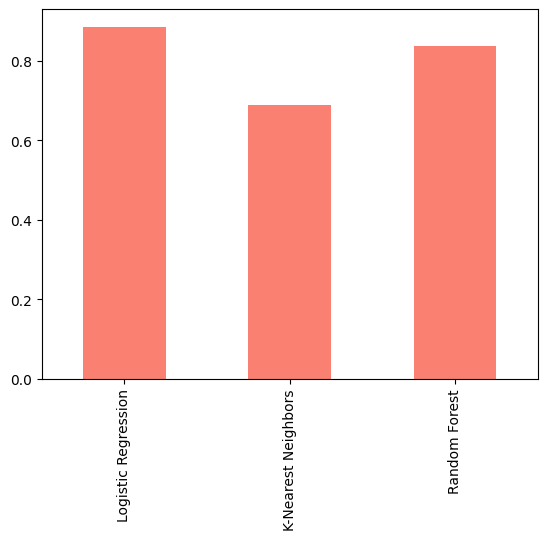

In [23]:
model_comparison = pd.DataFrame(model_scores, index=["accuracy"])
model_comparison.T.plot.bar(color="salmon", legend=False); 

| Classification | Regression
|:------|:------
| Accuracy | R-squared
| Precision | Mean absolute error (MAE)
| Recall | Mean squared error (MSE)
| F1 | Root mean squared error (RMSE)

Let's rewind the tape, focus on classification tuning to beat logistic regression, redo:
- Hyperparameter tuning
- Feature importance
- Confusion matrix
- Cross-validation
- Precision
- Recall
- F1 score
- Classsification reprot
- ROC curve
- Area undre the curve(AUC)

### Hyperparameter tuning (by hand)


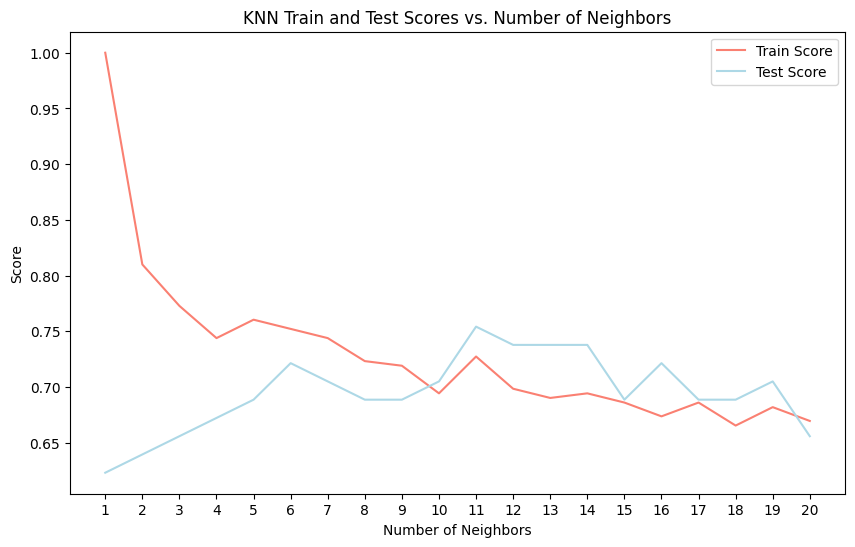

In [24]:
# let's tune KNN model
train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21)

# Set up a KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors values
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the model to the training data
    knn.fit(X_train, y_train)
    
    # Append the training and testing scores
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

# Plot the train and test scores
plt.figure(figsize=(10, 6))
plt.plot(neighbors, train_scores, label="Train Score", color="salmon")
plt.plot(neighbors, test_scores, label="Test Score", color="lightblue")
plt.title("KNN Train and Test Scores vs. Number of Neighbors")
plt.xlabel("Number of Neighbors")
plt.ylabel("Score")
plt.xticks(np.arange(1, 21, 1))
plt.legend()
plt.show()

## Hyperparameter tuning with RandomizedSearchCV

In [38]:
# let's use randomized search to find the best hyperparameters for LogisticRegression and RandomForestClassifier

# Create a hyperparameter grid for Logistic Regression
log_reg_grid = {
    "C": np.logspace(-4, 4, 20),
    "solver": ["liblinear"]
}

# Create a hyperparameter grid for Random Forest
rf_grid = {
    "n_estimators": np.arange(10, 100, 10),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2)
}

# Create a function to perform randomized search
def randomized_search(model, param_grid, X_train, y_train, n_iter=10):
    """
    Performs randomized search on a given model and parameter grid.
    
    model: the machine learning model to tune
    param_grid: dictionary of hyperparameters to tune
    X_train: training data features
    y_train: training data labels
    n_iter: number of iterations for randomized search
    """
    np.random.seed(42)
    
    # Create a RandomizedSearchCV instance
    rs_model = RandomizedSearchCV(model, 
                                  param_distributions=param_grid, 
                                  n_iter=n_iter, 
                                  cv=5, 
                                  verbose=True, 
                                  random_state=42,
                                )
    
    # Fit the model to the training data
    rs_model.fit(X_train, y_train)
    
    return rs_model

In [39]:
# Tune Logistic Regression
log_reg = LogisticRegression()
log_reg_rs = randomized_search(log_reg, log_reg_grid, X_train, y_train, n_iter=20)
# Show the best parameters for Logistic Regression
log_reg_rs.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'solver': 'liblinear', 'C': np.float64(0.23357214690901212)}

In [40]:
log_reg_rs.score(X_test, y_test)

0.8852459016393442

In [41]:
# Tune Random Forest
rf = RandomForestClassifier()
rf_rs = randomized_search(rf, rf_grid, X_train, y_train, n_iter=20)
# Show the best parameters for Random Forest
rf_rs.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'n_estimators': np.int64(50),
 'min_samples_split': np.int64(10),
 'min_samples_leaf': np.int64(19),
 'max_depth': None}

In [42]:
rf_rs.score(X_test, y_test)

0.8688524590163934

### Hyperparameter tuning with GridSearchCV
Since our logisticRegression model scores the best so far, let's try and improve them again using\
GridSearchCV

In [50]:
# Let's use GridSearchCV to tune our Logistic Regression model further
# Create a hyperparameter grid for Logistic Regression
log_reg_grid = {
    "C": np.logspace(-4, 4, 30),
    "solver": ["liblinear"]
}

# Set up a GridSearchCV instance
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)
# Fit the GridSearchCV instance to the training data
gs_log_reg.fit(X_train, y_train)
# Show the best parameters for Logistic Regression
gs_log_reg.score(X_test, y_test)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


0.8852459016393442

In [59]:
gs_log_reg.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

## Evaluate tuned model beyond accuracy
* Roc curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

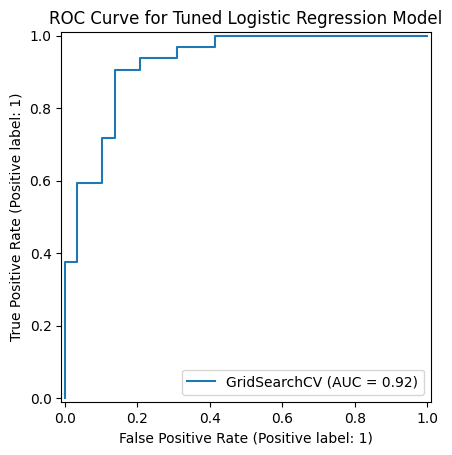

AUC Score: 0.92


In [52]:
# Make predictions with the tuned model
y_preds = gs_log_reg.predict(X_test)
# Plot the ROC curve and calculate the AUC score
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)
plt.title("ROC Curve for Tuned Logistic Regression Model")
plt.show()
# Calculate the AUC score
auc_score = roc_auc_score(y_test, gs_log_reg.predict_proba(X_test)[:, 1])
print(f"AUC Score: {auc_score:.2f}") 

In [55]:
# Make a confusion matrix function
def plot_confusion_matrix(y_test, y_preds):
    """
    Plots a confusion matrix.
    
    y_test: true labels
    y_preds: predicted labels
    """
    conf_matrix = confusion_matrix(y_test, y_preds)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix for Tuned Logistic Regression Model")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

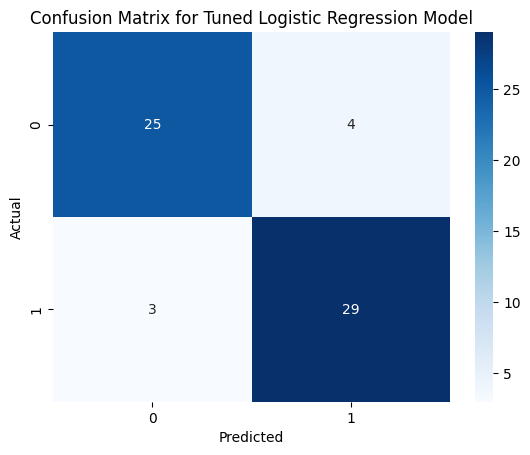

In [56]:
# Calculate the confusion matrix
plot_confusion_matrix(y_test, y_preds)

In [57]:
# Classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metircs using cross-validation

In [58]:
# Check the best hyperparameters
gs_log_reg.best_params_


{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [60]:
# Creat a new model with the best hyperparameters
best_log_reg = LogisticRegression(C=0.20433597178569418, solver="liblinear")
# Cross-validate the best model
cv_accuracy = cross_val_score(best_log_reg, X, y, cv=5, scoring="accuracy")
cv_accuracy = cv_accuracy.mean()
print(f"Cross-validated accuracy: {cv_accuracy:.2f}")


Cross-validated accuracy: 0.84


In [61]:
# Cross-validate the best model for its precision
cv_precision = cross_val_score(best_log_reg, X, y, cv=5, scoring="precision")
cv_precision = cv_precision.mean()
print(f"Cross-validated precision: {cv_precision:.2f}")

Cross-validated precision: 0.82


In [62]:
# Cross-validate the best model for its recall
cv_recall = cross_val_score(best_log_reg, X, y, cv=5, scoring="recall")
cv_recall = cv_recall.mean()
print(f"Cross-validated recall: {cv_recall:.2f}")

Cross-validated recall: 0.92


In [63]:
# Cross-validate the best model for its F1 score
cv_f1 = cross_val_score(best_log_reg, X, y, cv=5, scoring="f1")
cv_f1 = cv_f1.mean()
print(f"Cross-validated F1 score: {cv_f1:.2f}")

Cross-validated F1 score: 0.87


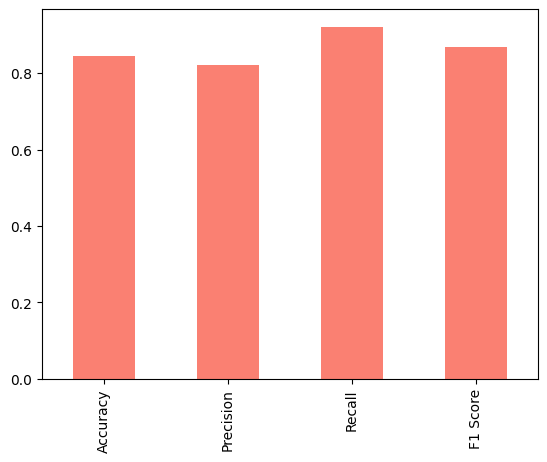

In [64]:
# Visualize the cross-validated scores
cv_scores = pd.DataFrame({
    "Accuracy": [cv_accuracy],
    "Precision": [cv_precision],
    "Recall": [cv_recall],
    "F1 Score": [cv_f1]
})
cv_scores.T.plot.bar(color="salmon", legend=False);

### Feature Importance

Feature importance is another way asking "which features contributed most\
to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model.

Let's find the feature importance for our LogisticRegression model...

In [67]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418, solver='liblinear')
clf.fit(X_train, y_train)
clf.coef_

array([[ 0.00320769, -0.86062049,  0.66001432, -0.01155971, -0.00166496,
         0.04017236,  0.31603405,  0.02458922, -0.60470171, -0.56795456,
         0.45085392, -0.63733328, -0.67555094]])

In [69]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': np.float64(0.0032076883508599633),
 'sex': np.float64(-0.8606204883695241),
 'cp': np.float64(0.660014324982524),
 'trestbps': np.float64(-0.01155970600550047),
 'chol': np.float64(-0.0016649614843449207),
 'fbs': np.float64(0.040172360271308105),
 'restecg': np.float64(0.31603405294617176),
 'thalach': np.float64(0.02458922341328129),
 'exang': np.float64(-0.604701713592625),
 'oldpeak': np.float64(-0.5679545646616215),
 'slope': np.float64(0.4508539209693025),
 'ca': np.float64(-0.6373332766360461),
 'thal': np.float64(-0.6755509369619848)}

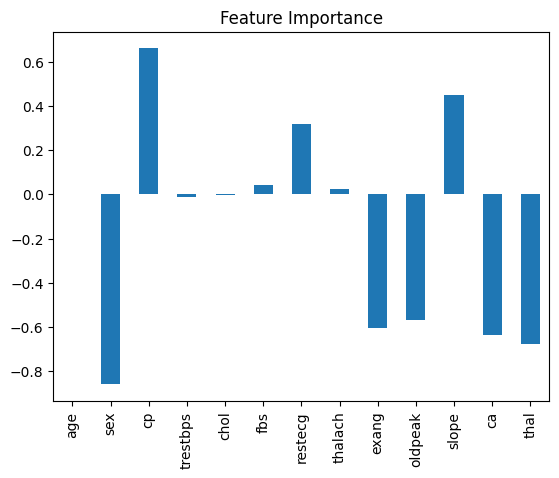

In [70]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [71]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [72]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


## Experimentation

We haven't hit the evaluation metric, which is 95% accuracy.

* Could we collect more data?
* Could we try a better model? Like Catboost or XGBoost?
* Could we improve the current models? (beyond what we've done so far)
* Assume the model is good enough (we hit the evaluation metric), how could we share it with others?

